Analysis of Data Sources:

In [74]:
!pip install seaborn


In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [76]:
#import combine data file
combine_data = pd.read_csv("AllCombine")
combine_data.head()

,Unnamed: 0,Player,Pos,School,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle
0,0,Khalid Abdullah,OLB,Mars Hill,6-2,227.0,4.61,36.5,26.0,126.0,7.13,4.25
1,1,Anthony Adams,DT,Penn State,6-0,299.0,5.13,30.5,0.0,109.0,7.68,4.59
2,2,Sam Aiken,WR,North Carolina,6-2,209.0,4.59,39.5,0.0,121.0,7.22,0.00
3,3,Paul Arnold,WR,Washington,6-1,213.0,4.53,40.5,0.0,131.0,6.84,4.11
4,4,B.J. Askew,RB,Michigan,6-2,241.0,4.60,0.0,0.0,0.0,0.00,0.00


In [77]:
#Summary of Combine Data
summary_stats_single = combine_data.describe().rename(index={'mean': 'Mean', '50%': 'Median', 'std': 'Std', '50%': 'Median'})
print(summary_stats_single)

         Unnamed: 0           Wt         40yd     Vertical        Bench  \
count   7680.000000  7680.000000  7680.000000  7680.000000  7680.000000   
Mean    3839.500000   241.990104     4.481572    25.407656    13.769661   
Std     2217.169367    47.171999     1.186797    14.281995    11.099401   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%     1919.750000   205.000000     4.510000    24.500000     0.000000   
Median  3839.500000   232.000000     4.670000    31.500000    16.000000   
75%     5759.250000   280.000000     4.950000    35.000000    23.000000   
max     7679.000000   384.000000     6.050000    46.500000    49.000000   

         Broad Jump        3Cone      Shuttle  
count   7680.000000  7680.000000  7680.000000  
Mean      87.424609     4.545194     2.804036  
Std       49.421477     3.544137     2.125903  
min        0.000000     0.000000     0.000000  
25%       93.000000     0.000000     0.000000  
Median   112.000000     6.940000    

In [78]:
summary_stats_single.head()

,Unnamed: 0,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle
count,7680.000000,7680.000000,7680.000000,7680.000000,7680.000000,7680.000000,7680.000000,7680.000000
Mean,3839.500000,241.990104,4.481572,25.407656,13.769661,87.424609,4.545194,2.804036
Std,2217.169367,47.171999,1.186797,14.281995,11.099401,49.421477,3.544137,2.125903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1919.750000,205.000000,4.510000,24.500000,0.000000,93.000000,0.000000,0.000000


In [79]:
#Filter desired positions
desired_positions = ['QB', 'WR', 'TE', 'RB', 'K']
combine_pos_filtered = combine_data[combine_data['Pos'].isin(desired_positions)]

print(combine_pos_filtered)

      Unnamed: 0            Player Pos           School    Ht     Wt  40yd  \
2              2         Sam Aiken  WR   North Carolina   6-2  209.0  4.59   
3              3       Paul Arnold  WR       Washington   6-1  213.0  4.53   
4              4        B.J. Askew  RB         Michigan   6-2  241.0  4.60   
9              9        Brad Banks  QB             Iowa  5-11  201.0  4.67   
14            14      Arnaz Battle  WR       Notre Dame   6-1  217.0  4.58   
...          ...               ...  ..              ...   ...    ...   ...   
7674        7674     Renaldo Works  RB         Oklahoma   6-0  222.0  4.70   
7675        7675     Carlos Wright  WR  Tennessee State   6-1  203.0  4.65   
7676        7676      Jason Wright  RB     Northwestern  5-10  210.0  4.68   
7678        7678     Kirk Yliniemi   K     Oregon State   6-0  214.0  4.69   
7679        7679  Kevin Youngblood  WR          Clemson   6-4  213.0  4.64   

      Vertical  Bench  Broad Jump  3Cone  Shuttle  
2         3

In [80]:
combine_pos_filtered.count()

Unnamed: 0    2685
Player        2685
Pos           2685
School        2685
Ht            2685
Wt            2685
40yd          2685
Vertical      2685
Bench         2685
Broad Jump    2685
3Cone         2685
Shuttle       2685
dtype: int64

In [81]:
#Groupby by Position
combine_pos = combine_pos_filtered.groupby(['Pos'])
combine_pos.count()

,Unnamed: 0,Player,School,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle
Pos,,,,,,,,,,,
K,104,104,104,104,104,104,104,104,104,104,104
QB,417,417,417,417,417,417,417,417,417,417,417
RB,673,673,673,673,673,673,673,673,673,673,673
TE,428,428,428,428,428,428,428,428,428,428,428
WR,1063,1063,1063,1063,1063,1063,1063,1063,1063,1063,1063


c:\Users\mjeow\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mjeow\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mjeow\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


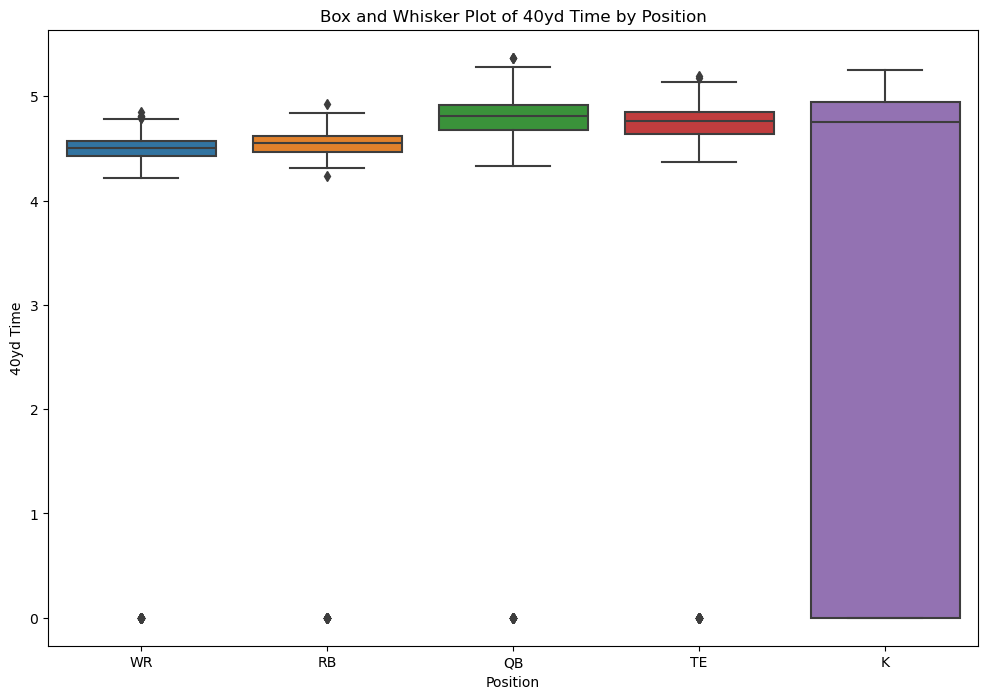

In [82]:
#Box and Whisker of Individual Combine Events
import seaborn as sns

desired_positions = ['QB', 'WR', 'TE', 'RB', 'K']
filtered_data = combine_data[combine_data['Pos'].isin(desired_positions)]

plt.figure(figsize=(12, 8))
sns.boxplot(x='Pos', y='40yd', data=filtered_data)
plt.xlabel('Position')
plt.ylabel('40yd Time')
plt.title('Box and Whisker Plot of 40yd Time')
plt.show()


c:\Users\mjeow\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mjeow\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mjeow\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mjeow\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

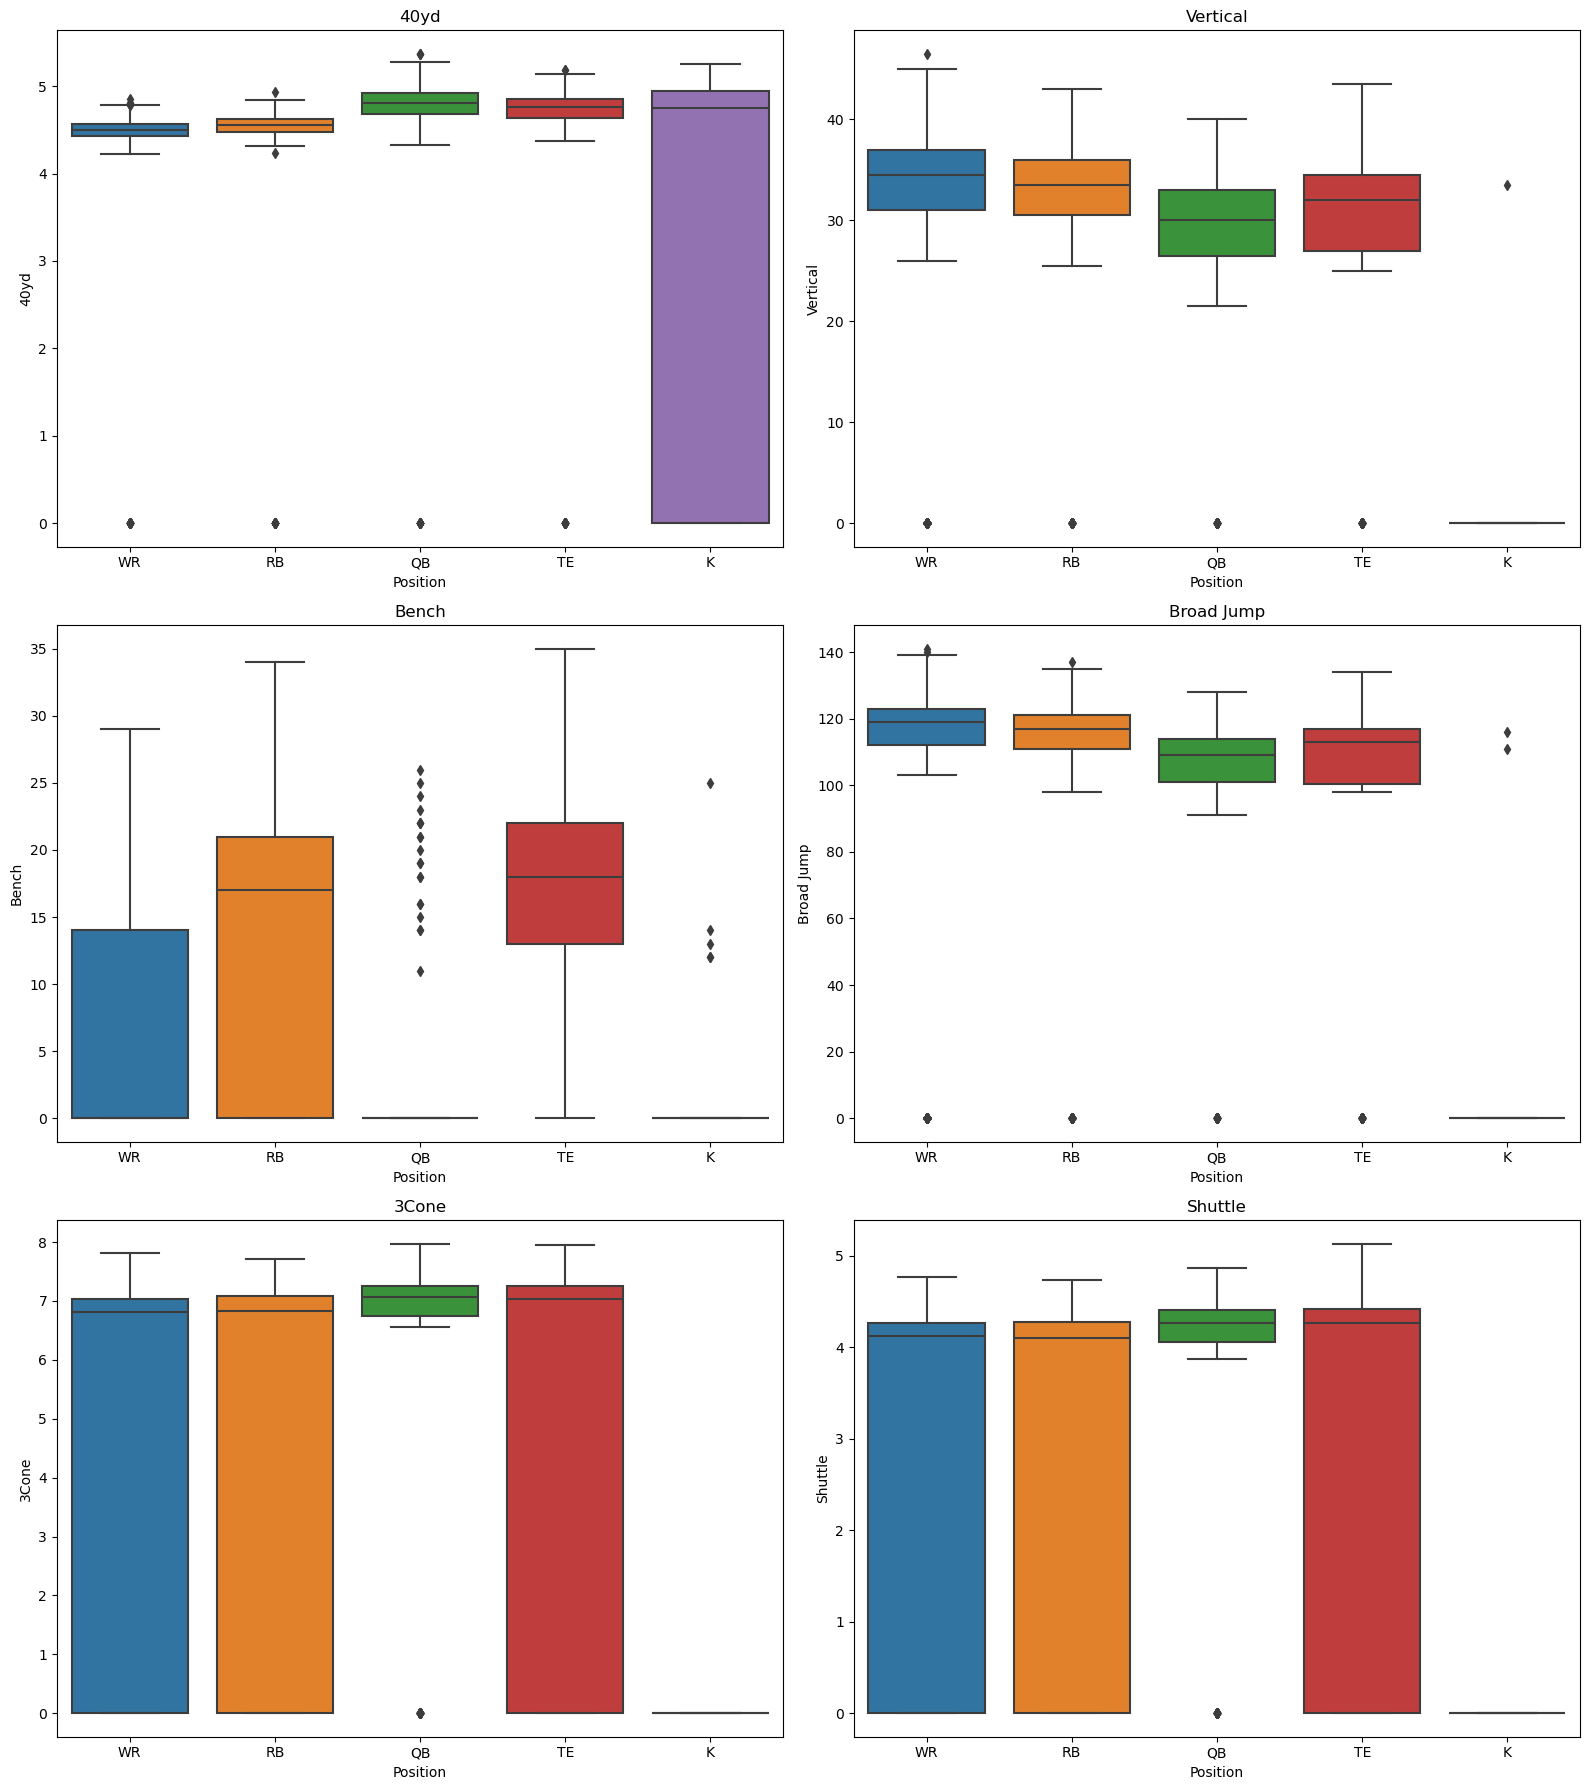

In [112]:
desired_positions = ['QB', 'WR', 'TE', 'RB', 'K']
filtered_data = combine_data[combine_data['Pos'].isin(desired_positions)]

columns_to_plot = ['40yd', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 18))
axes = axes.flatten()


for i, column in enumerate(columns_to_plot):
    sns.boxplot(x='Pos', y=column, data=filtered_data, ax=axes[i])
    axes[i].set_xlabel('Position')
    axes[i].set_ylabel(column)
    axes[i].set_title(f'{column}')


plt.tight_layout()
plt.show()

Fantasy Points Dataframe:

In [84]:
ff_data = pd.read_csv("DataFrames/FullFFMerge.csv")
ff_data.head()

C:\Users\mjeow\AppData\Local\Temp\ipykernel_15492\1323350992.py:1: DtypeWarning: Columns (3,23,42,61,80,99,118,137,156,175,194,213,232,251,270,289,308,327,346,365) have mixed types. Specify dtype option on import or set low_memory=False.
  ff_data = pd.read_csv("DataFrames/FullFFMerge.csv")


,Unnamed: 0,index2000,Player,Tm_2000,Pos,Age_2000,G_2000,GS_2000,Tgt_2000,Rec_2000,...,Rushingyds_2020,RushingTD_2020,RushingAtt_2020,ReceivingYds_2020,ReceivingTD_2020,FantasyPoints_2020,Int_2020,Fumbles_2020,FumblesLost_2020,Total Fantasy Points
0,0,0.0,Marshall Faulk,STL,RB,27.0,14.0,14.0,113.0,81.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1665.10
1,1,1.0,Edgerrin James,IND,RB,22.0,16.0,16.0,87.0,63.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2124.10
2,2,2.0,Daunte Culpepper,MIN,QB,23.0,16.0,16.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1741.72
3,3,3.0,Jeff Garcia,SFO,QB,30.0,16.0,16.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1668.22
4,4,4.0,Eddie George,TEN,RB,27.0,16.0,16.0,65.0,50.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1024.90


In [85]:
summary_stats_single = ff_data.describe().rename(index={'mean': 'Mean', '50%': 'Median', 'std': 'Std', '50%': 'Median'})
print(summary_stats_single)

         Unnamed: 0    index2000     Age_2000       G_2000      GS_2000  \
count   4188.000000  4188.000000  4188.000000  4188.000000  4188.000000   
Mean    2093.500000    37.003820     3.561843     1.530564     0.717049   
Std     1209.115793   111.140388     9.156404     4.322698     2.841305   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%     1046.750000     0.000000     0.000000     0.000000     0.000000   
Median  2093.500000     0.000000     0.000000     0.000000     0.000000   
75%     3140.250000     0.000000     0.000000     0.000000     0.000000   
max     4187.000000   556.000000    44.000000    16.000000    16.000000   

           Tgt_2000     Rec_2000  PassingYds_2000  PassingTD_2000  \
count   4188.000000  4188.000000      4188.000000     4188.000000   
Mean       3.838109     2.296323        26.294651        0.151385   
Std       17.257558    10.386917       266.198107        1.656278   
min        0.000000     0.000000        -4.00000

In [86]:
print(st.normaltest(ff_data['Total Fantasy Points']))

NormaltestResult(statistic=3042.768082926703, pvalue=0.0)


c:\Users\mjeow\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mjeow\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mjeow\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


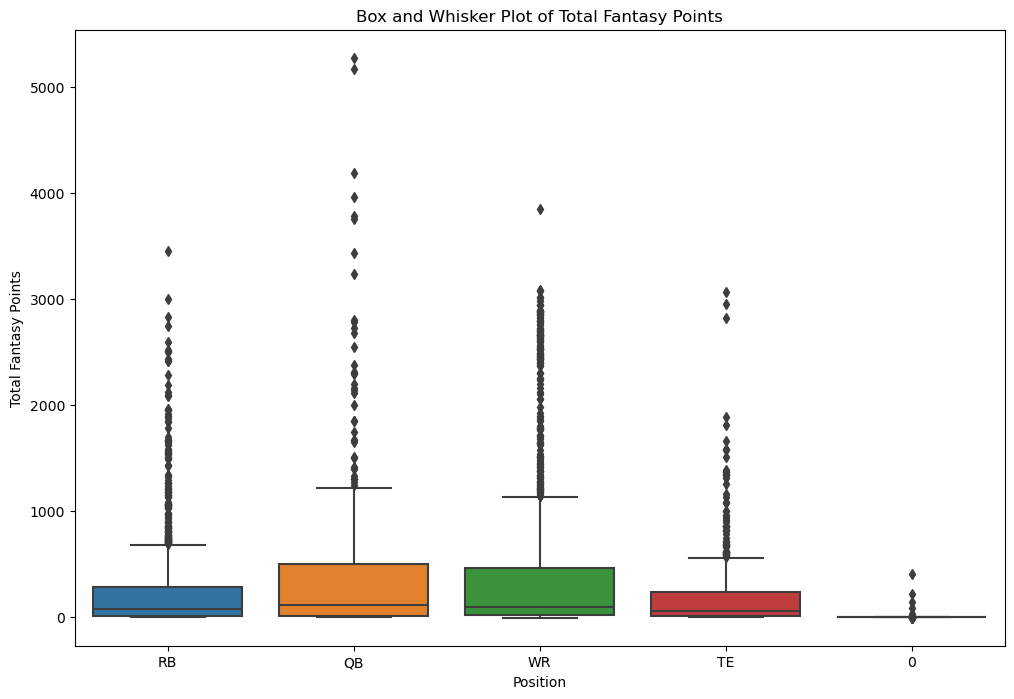

In [87]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Pos', y='Total Fantasy Points', data=ff_data)
plt.title('Box and Whisker Plot of Total Fantasy Points')
plt.xlabel('Position')
plt.ylabel('Total Fantasy Points')
plt.show()

Analysis of Individual Combine Events:

In [88]:
zero_count = combine_data['40yd'].value_counts().get(0, 0)

print(f"Number of NaN values in the '40yd' column: {zero_count}")

Number of NaN values in the '40yd' column: 474


2685


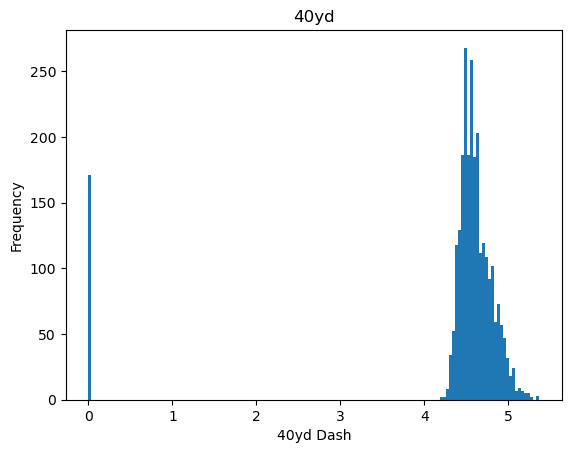

In [89]:
combine_pos_flat = combine_pos['40yd'].apply(lambda x: np.nan if isinstance(x, (list, tuple)) else x)

print(combine_pos_flat.count())

plt.hist(combine_pos_flat, bins='auto')
plt.xlabel('40yd Dash')
plt.ylabel('Frequency')
plt.title('40yd')
plt.show()

In [90]:
combine_pos_filtered['40yd'] = combine_pos_filtered['40yd'].replace(0.0, pd.NA)
combine_pos_filtered['40yd'] = pd.to_numeric(combine_pos_filtered['40yd'], errors='coerce')
combine_pos_filtered = combine_pos_filtered.dropna(subset=['40yd'])

C:\Users\mjeow\AppData\Local\Temp\ipykernel_15492\1333347371.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combine_pos_filtered['40yd'] = combine_pos_filtered['40yd'].replace(0.0, pd.NA)
C:\Users\mjeow\AppData\Local\Temp\ipykernel_15492\1333347371.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combine_pos_filtered['40yd'] = pd.to_numeric(combine_pos_filtered['40yd'], errors='coerce')


In [91]:
combine_pos_filtered.count()

Unnamed: 0    2514
Player        2514
Pos           2514
School        2514
Ht            2514
Wt            2514
40yd          2514
Vertical      2514
Bench         2514
Broad Jump    2514
3Cone         2514
Shuttle       2514
dtype: int64

In [92]:
print(st.normaltest(combine_pos_filtered['40yd']))

NormaltestResult(statistic=223.05953681159133, pvalue=3.657943670686471e-49)


(array([ 46., 330., 743., 579., 366., 234., 144.,  47.,  19.,   6.]),
 array([4.22 , 4.335, 4.45 , 4.565, 4.68 , 4.795, 4.91 , 5.025, 5.14 ,
        5.255, 5.37 ]),
 <BarContainer object of 10 artists>)

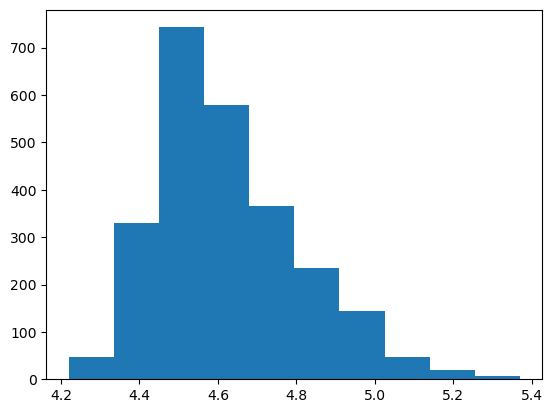

In [93]:
plt.hist(combine_pos_filtered['40yd'])

In [94]:
combine_pos = combine_pos_filtered.groupby(['Pos'])

combine_pos_40yd_mean = combine_pos['40yd'].mean()
combine_pos_40yd_median = combine_pos['40yd'].median()
combine_pos_40yd_var = combine_pos['40yd'].var()
combine_pos_40yd_std = combine_pos['40yd'].std()
combine_pos_40yd_sem = combine_pos['40yd'].sem()

In [95]:
combine_pos.count()

,Unnamed: 0,Player,School,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle
Pos,,,,,,,,,,,
K,61,61,61,61,61,61,61,61,61,61,61
QB,393,393,393,393,393,393,393,393,393,393,393
RB,648,648,648,648,648,648,648,648,648,648,648
TE,396,396,396,396,396,396,396,396,396,396,396
WR,1016,1016,1016,1016,1016,1016,1016,1016,1016,1016,1016


In [96]:
summary_40yd = pd.DataFrame({
    'Mean': combine_pos_40yd_mean,
    'Median': combine_pos_40yd_median,
    'Var': combine_pos_40yd_var,
    'Std': combine_pos_40yd_std,
    'Sem': combine_pos_40yd_sem})

summary_40yd

,Mean,Median,Var,Std,Sem
Pos,,,,,
K,4.910984,4.920,0.022479,0.149930,0.019197
QB,4.822443,4.820,0.030396,0.174345,0.008795
RB,4.555108,4.560,0.011772,0.108500,0.004262
TE,4.769167,4.775,0.020625,0.143614,0.007217
WR,4.511437,4.510,0.010403,0.101997,0.003200


In [97]:
combine_pos_filtered['Vertical'] = combine_pos_filtered['Vertical'].replace(0.0, pd.NA)
combine_pos_filtered['Vertical'] = pd.to_numeric(combine_pos_filtered['Vertical'], errors='coerce')
combine_pos_clean = combine_pos_filtered.dropna(subset=['Vertical'])

In [98]:
combine_pos_clean.count()

Unnamed: 0    2067
Player        2067
Pos           2067
School        2067
Ht            2067
Wt            2067
40yd          2067
Vertical      2067
Bench         2067
Broad Jump    2067
3Cone         2067
Shuttle       2067
dtype: int64

In [99]:
combine_pos_vertical_mean = combine_pos['Vertical'].mean()
combine_pos_vertical_median = combine_pos['Vertical'].median()
combine_pos_vertical_var = combine_pos['Vertical'].var()
combine_pos_vertical_std = combine_pos['Vertical'].std()
combine_pos_vertical_sem = combine_pos['Vertical'].sem()

In [100]:
summary_vertical = pd.DataFrame({
    'Mean': combine_pos_vertical_mean,
    'Median': combine_pos_vertical_median,
    'Var': combine_pos_vertical_var,
    'Std': combine_pos_vertical_std,
    'Sem': combine_pos_vertical_sem})

summary_vertical

,Mean,Median,Var,Std,Sem
Pos,,,,,
K,33.500000,33.5,NaN,NaN,NaN
QB,31.185075,31.0,9.992591,3.161106,0.172710
RB,34.362976,34.0,9.181645,3.030123,0.129088
TE,33.003106,33.0,10.693137,3.270036,0.182232
WR,35.326340,35.5,9.892794,3.145281,0.107378


In [101]:
combine_pos_filtered['Bench'] = combine_pos_filtered['Bench'].replace(0.0, pd.NA)
combine_pos_filtered['Bench'] = pd.to_numeric(combine_pos_filtered['Bench'], errors='coerce')
combine_pos_filtered = combine_pos_filtered.dropna(subset=['Bench'])

In [102]:
combine_pos_bench_mean = combine_pos['Bench'].mean()
combine_pos_bench_median = combine_pos['Bench'].median()
combine_pos_bench_var = combine_pos['Bench'].var()
combine_pos_bench_std = combine_pos['Bench'].std()
combine_pos_bench_sem = combine_pos['Bench'].sem()

In [103]:
summary_bench = pd.DataFrame({
    'Mean': combine_pos_bench_mean,
    'Median': combine_pos_bench_median,
    'Var': combine_pos_bench_var,
    'Std': combine_pos_bench_std,
    'Sem': combine_pos_bench_sem})

summary_bench

,Mean,Median,Var,Std,Sem
Pos,,,,,
K,17.333333,14.0,44.333333,6.658328,3.844188
QB,19.300000,19.5,16.326316,4.040584,0.903502
RB,19.334711,19.0,21.051298,4.588169,0.208553
TE,20.160883,20.0,19.401250,4.404685,0.247392
WR,14.571138,14.0,17.092689,4.134331,0.186390


In [104]:
combine_pos_filtered['Broad Jump'] = combine_pos_filtered['Broad Jump'].replace(0.0, pd.NA)
combine_pos_filtered['Broad Jump'] = pd.to_numeric(combine_pos_filtered['Broad Jump'], errors='coerce')
combine_pos_filtered = combine_pos_filtered.dropna(subset=['Broad Jump'])

C:\Users\mjeow\AppData\Local\Temp\ipykernel_15492\3798014976.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combine_pos_filtered['Broad Jump'] = combine_pos_filtered['Broad Jump'].replace(0.0, pd.NA)
C:\Users\mjeow\AppData\Local\Temp\ipykernel_15492\3798014976.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combine_pos_filtered['Broad Jump'] = pd.to_numeric(combine_pos_filtered['Broad Jump'], errors='coerce')


In [105]:
combine_pos_broad_mean = combine_pos['Broad Jump'].mean()
combine_pos_broad_mean


Pos
K      3.721311
QB    94.768448
RB    98.797840
TE    92.116162
WR    99.361220
Name: Broad Jump, dtype: float64

In [106]:
combine_pos_filtered['3Cone'] = combine_pos_filtered['3Cone'].replace(0.0, pd.NA)
combine_pos_filtered['3Cone'] = pd.to_numeric(combine_pos_filtered['3Cone'], errors='coerce')
combine_pos_filtered = combine_pos_filtered.dropna(subset=['3Cone'])

In [107]:

combine_pos_3Cone_mean = combine_pos['3Cone'].mean()
combine_pos_3Cone_mean

Pos
K     0.000000
QB    5.750102
RB    4.036373
TE    5.103990
WR    4.585138
Name: 3Cone, dtype: float64

In [108]:
combine_pos_filtered['Shuttle'] = combine_pos_filtered['Shuttle'].replace(0.0, pd.NA)
combine_pos_filtered['Shuttle'] = pd.to_numeric(combine_pos_filtered['Shuttle'], errors='coerce')
combine_pos_filtered = combine_pos_filtered.dropna(subset=['Shuttle'])

In [109]:
combine_pos_shuttle_mean = combine_pos['Shuttle'].mean()
combine_pos_shuttle_mean

Pos
K     0.000000
QB    3.549389
RB    2.466204
TE    3.122424
WR    2.849154
Name: Shuttle, dtype: float64

In [110]:
summary_mean_pos = pd.DataFrame({
    '40 Yd': combine_pos_40yd_mean,
    'Bench': combine_pos_bench_mean,
    'Vertical': combine_pos_vertical_mean,
    'Broad Jump': combine_pos_broad_mean,
    '3 Cone': combine_pos_3Cone_mean,
    'Shuttle': combine_pos_shuttle_mean })

summary_mean_pos

,40 Yd,Bench,Vertical,Broad Jump,3 Cone,Shuttle
Pos,,,,,,
K,4.910984,17.333333,33.500000,3.721311,0.000000,0.000000
QB,4.822443,19.300000,31.185075,94.768448,5.750102,3.549389
RB,4.555108,19.334711,34.362976,98.797840,4.036373,2.466204
TE,4.769167,20.160883,33.003106,92.116162,5.103990,3.122424
WR,4.511437,14.571138,35.326340,99.361220,4.585138,2.849154


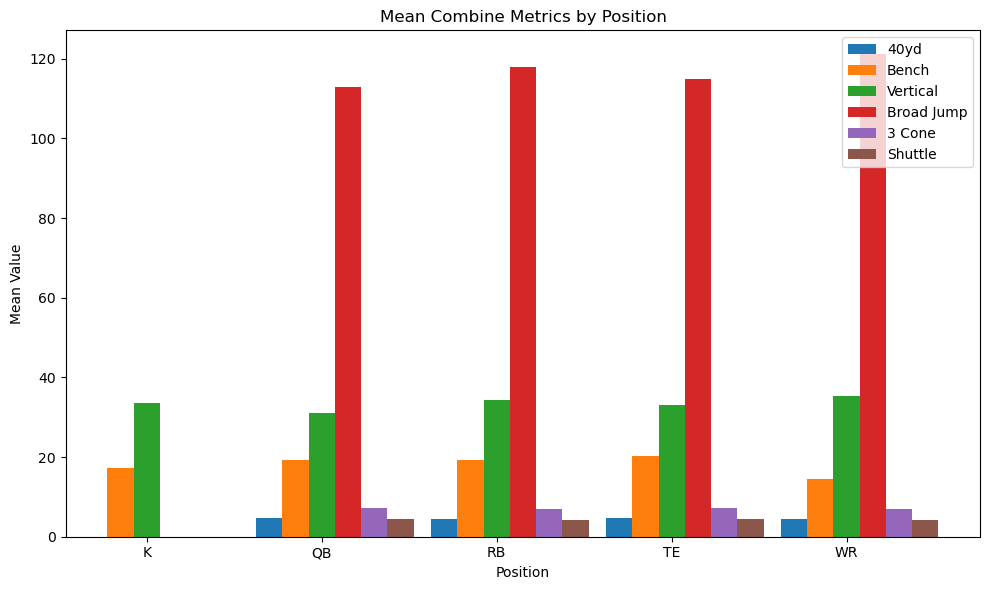

In [111]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample data (replace this with your actual data)
data = {
    'Position': ['K', 'QB', 'RB', 'TE', 'WR'],
    '40yd': [np.nan, 4.818462, 4.559631, 4.766500, 4.511582],
    'Bench': [17.333333, 19.3, 19.334711, 20.160883, 14.571138],
    'Vertical': [33.5, 31.185075, 34.362976, 33.003106, 35.32634],
    'Broad Jump': [np.nan, 113.0, 118.050336, 114.895833, 121.079096],
    '3 Cone': [np.nan, 7.151538, 7.071409, 7.184917, 6.956186],
    'Shuttle': [np.nan, 4.358462, 4.272651, 4.363167, 4.259435]
}

df = pd.DataFrame(data)
positions = df['Position']
metrics = df.columns[1:]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.15
bar_positions = np.arange(len(positions))

for i, metric in enumerate(metrics):
    bars = ax.bar(bar_positions + i * bar_width, df[metric], bar_width, label=metric)

# Customize the chart
ax.set_xticks(bar_positions + 2 * bar_width)
ax.set_xticklabels(positions)
ax.legend()
ax.set_xlabel('Position')
ax.set_ylabel('Mean Value')
ax.set_title('Mean Combine Metrics by Position')

# Show the plot
plt.tight_layout()
plt.show()
